### Import Library and Load file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('udemy_data/3.01. Country clusters.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    6 non-null      object 
 1   Latitude   6 non-null      float64
 2   Longitude  6 non-null      float64
 3   Language   6 non-null      object 
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes


In [4]:
df.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


### Plot the Data

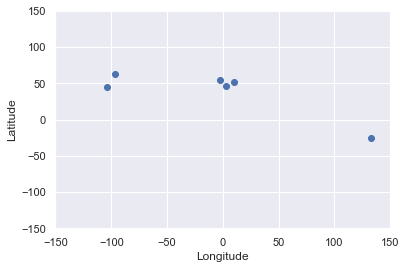

In [5]:
#make a scatter plot based on longitude and latitude
plt.scatter(df['Longitude'],df['Latitude'])
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Select the feature

In [6]:
#iloc[row,column]
x = df.iloc[:,1:3] # first : mean all (get the latitude and longitude data from data frame)

### Clustering 

In [7]:
kmeans = KMeans(3) #3 is the number of centroid or cluster
kmeans.fit(x)

KMeans(n_clusters=3)

### Clustering Results

In [8]:
identify_cluster = kmeans.predict(x)
identify_cluster

array([0, 0, 1, 1, 1, 2])

In [9]:
data_with_cluster = df.copy() #copy data
data_with_cluster['Label']=identify_cluster #add label in pandas data
data_with_cluster.head(10)

,Country,Latitude,Longitude,Language,Label
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


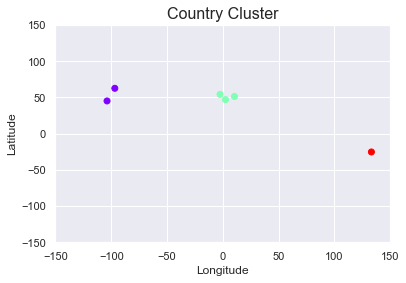

In [10]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'], c=data_with_cluster['Label'],cmap='rainbow')
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Country Cluster", fontsize=16)
plt.show()

### Work with categorical data

In [11]:
data = data_with_cluster.copy()
data['Language']=data['Language'].map({'English':0,'French':1,'German':2}) #add the data with language and map the data
data.head(10)

,Country,Latitude,Longitude,Language,Label
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


In [12]:
x = data.iloc[:,1:4]

In [13]:
kmeans = KMeans(2)
kmeans.fit(x)
language_label = kmeans.predict(x)

In [14]:
data_with_language = data.copy()
data_with_language['Label'] = language_label

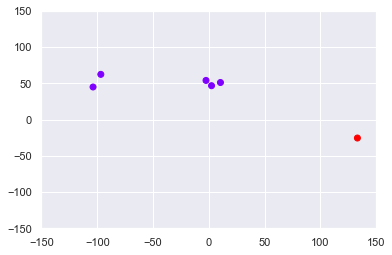

In [15]:
plt.scatter(data_with_language['Longitude'],data_with_language['Latitude'], c=data_with_language['Label'],cmap='rainbow')
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.show()

### How to determine the best number of clusters..? 
- WCSS (within-cluster sum of square), if we minimize the WCSS we have reached the perfect clustering solution
- We will use elbow method where the data will dicreasing with very big leaps, and then it will constant.
- The constant point will used as the number of Kmeans

In [16]:
kmeans.inertia_ #wcss value

13208.958119999996

In [17]:
wcss = []
for i in range (1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

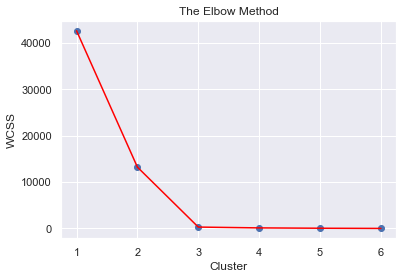

In [18]:
cluster = range(1,7)
plt.plot(cluster,wcss, color='red')
plt.scatter(cluster, wcss)
plt.title("The Elbow Method")
plt.xlabel("Cluster")
plt.ylabel("WCSS")
plt.show()
#the best is 3

Note:
- Use the elbow method to determine the best cluster number
- use init='k-means++', for better centroit location
- Remove outlier, kmeans very sensitive with outlier. Outlier can make 1 itself 

### Dendogram 

In [19]:
data = pd.read_csv('udemy_data/3.01. Country clusters.csv', index_col = 'Country') #make country as index
data.head()

,Latitude,Longitude,Language
Country,,,
USA,44.97,-103.77,English
Canada,62.40,-96.80,English
France,46.75,2.40,French
UK,54.01,-2.53,English
Germany,51.15,10.40,German


In [20]:
data_new = data.copy()
data_new = data_new.drop(['Language'], axis=1)
data_new

,Latitude,Longitude
Country,,
USA,44.97,-103.77
Canada,62.40,-96.80
France,46.75,2.40
UK,54.01,-2.53
Germany,51.15,10.40
Australia,-25.45,133.11


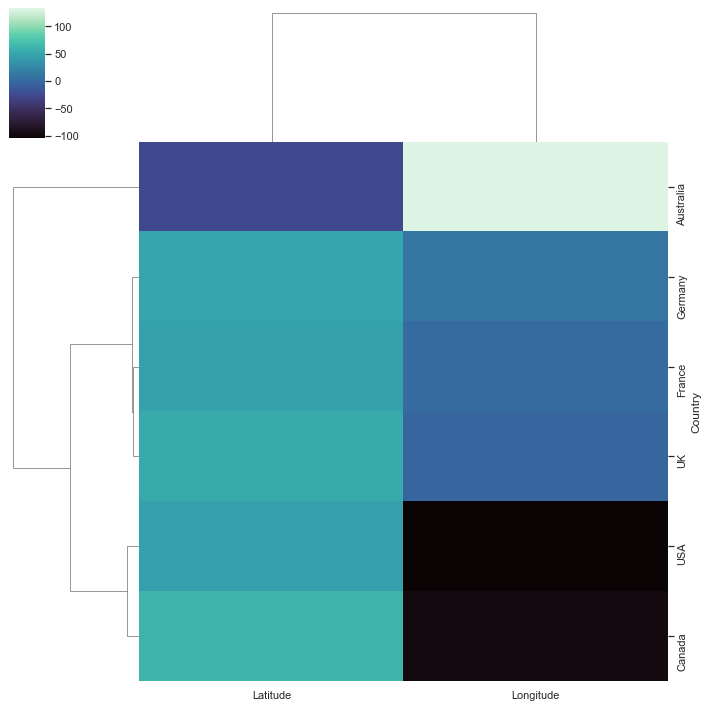

In [21]:
sns.clustermap(data_new, cmap='mako')

- The left side line is dendogram
- We can see that Australia is like outlier because has different color
- From the plot, we can conclude that there are 3 clusters

### Another example 1

In [22]:
df2 = pd.read_csv('udemy_data/Countries_exercise.csv') 

In [23]:
df2.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


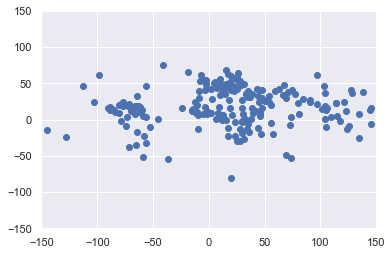

In [24]:
plt.scatter(df2['Longitude'],df2['Latitude'])
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.show()

In [25]:
x = df2.iloc[:,1:3]

In [26]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [27]:
predict_label = kmeans.predict(x)
predict_label

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1,
       1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1])

In [28]:
df_complete = df2.copy()
df_complete['Label']=predict_label
df_complete.head()

,name,Longitude,Latitude,Label
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1


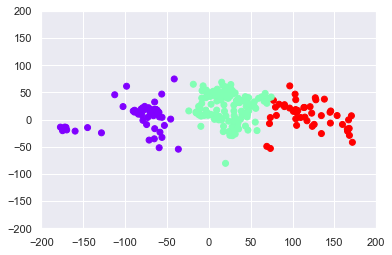

In [29]:
plt.scatter(df_complete['Longitude'],df_complete['Latitude'], c=df_complete['Label'], cmap='rainbow')
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.show()

### Example Categorical Data 2

In [30]:
df = pd.read_csv('udemy_data/Categorical.csv')
df.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [31]:
df.continent.value_counts() #calculate the unique value of feature

Africa                     54
Asia                       53
Europe                     50
North America              38
Oceania                    24
South America              13
Seven seas (open ocean)     8
Antarctica                  1
Name: continent, dtype: int64

In [32]:
df['continent']=df['continent'].map({'Africa':0,'Asia':1,'Europe':2,'North America':3,'Oceania':4,'South America':5, 'Seven seas (open ocean)':6,'Antarctica':7})
df.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,2


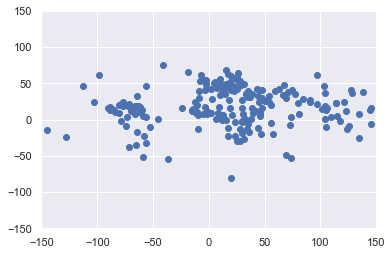

In [33]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.show()

In [34]:
feature = df.iloc[:,1:4]
feature.head()

,Longitude,Latitude,continent
0,-69.982677,12.520880,3
1,66.004734,33.835231,1
2,17.537368,-12.293361,0
3,-63.064989,18.223959,3
4,20.049834,41.142450,2


In [35]:
kmeans = KMeans(7)
kmeans.fit(feature)
label = kmeans.predict(feature)
df['Label'] = label
df.head()

,name,Longitude,Latitude,continent,Label
0,Aruba,-69.982677,12.520880,3,4
1,Afghanistan,66.004734,33.835231,1,3
2,Angola,17.537368,-12.293361,0,0
3,Anguilla,-63.064989,18.223959,3,4
4,Albania,20.049834,41.142450,2,2


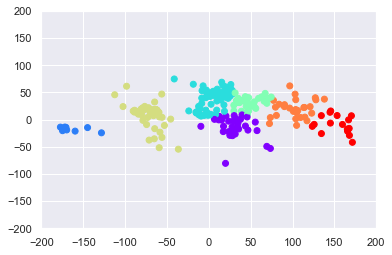

In [36]:
plt.scatter(df['Longitude'],df['Latitude'], c=df['Label'], cmap='rainbow')
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.show()

In [37]:
#wcss
wcss_value = []
for i in range (2,16):
    kmeans = KMeans(i)
    kmeans.fit(feature)
    wcss_value.append(kmeans.inertia_)

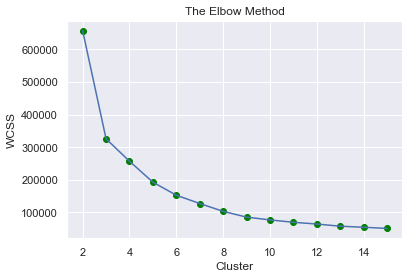

In [38]:
cluster = range(2,16)
plt.scatter(cluster, wcss_value, color='green')
plt.plot(cluster, wcss_value)
plt.title('The Elbow Method')
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

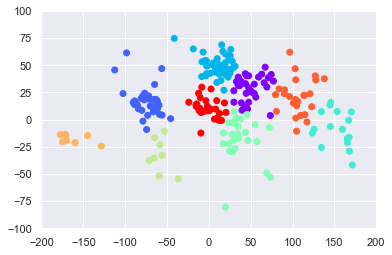

In [39]:
# I take 9 cluster
kmeans = KMeans(9)
kmeans.fit(feature)
label = kmeans.predict(feature)
df['Label'] = label
df.head()

plt.scatter(df['Longitude'],df['Latitude'], c=df['Label'], cmap='rainbow')
plt.xlim(-200,200)
plt.ylim(-100,100)
plt.show()